# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [42]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 573
['edinburgh of the seven seas', 'wailua homesteads', 'guerrero negro', 'huarmey', 'puerto natales', 'xique xique', 'bonthe', 'port alfred', 'impfondo', 'bethel', 'tiksi', 'haripur', 'port-aux-francais', 'tolanaro', 'mirny', 'margaret river', 'yellowknife', 'coquimbo', 'kapuskasing', 'grytviken', 'kiama', 'cidreira', 'mossel bay', 'gadzhiyevo', 'inarajan village', 'taiohae', 'bilibino', 'nyurba', 'veraval', 'kuytun', 'khandyga', "port saint john's", 'polyarnyy', 'san angelo', 'wynyard', 'iqaluit', 'albany', 'hasaki', 'mount pearl', 'remire-montjoly', 'waitangi', 'hadibu', 'kailua-kona', 'alofi', 'levski', 'alotau', 'jinchang', 'kenai', 'nova sintra', 'port elizabeth', 'sinabang', 'port mathurin', 'kodiak', 'vendenheim', "vrangel'", 'fale old settlement', 'crane', 'east london', 'kirillov', 'aksuat', 'yazman', 'blackmans bay', 'catabola', 'panaba', 'port augusta', 'alice springs', 'college', 'adamstown', "kirovs'k", 'papatowai', 'saudarkrokur', 'vorgasho

In [67]:
units = "metric"

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [71]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
#url + apiKey

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response_weather = requests.get(city_url)
        city_weather = response_weather.json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | wailua homesteads
Processing Record 3 of Set 1 | guerrero negro
Processing Record 4 of Set 1 | huarmey
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | xique xique
Processing Record 7 of Set 1 | bonthe
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | impfondo
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | haripur
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | tolanaro
Processing Record 15 of Set 1 | mirny
Processing Record 16 of Set 1 | margaret river
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | coquimbo
Processing Record 19 of Set 1 | kapuskasing
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | kiama
Processing Record 22 of Set 1 | cid

In [72]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
len(city_data_df)


552

In [73]:
# Display sample data
city_data_df.head()
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,18.78,81,47,9.34,SH,1705896939
1,wailua homesteads,22.0669,-159.3780,23.24,89,100,4.12,US,1705896940
2,guerrero negro,27.9769,-114.0611,16.84,89,62,4.26,MX,1705896940
3,huarmey,-10.0681,-78.1522,23.27,83,82,2.94,PE,1705896941
4,puerto natales,-51.7236,-72.4875,12.70,78,75,4.98,CL,1705896941
...,...,...,...,...,...,...,...,...,...
547,matamey,13.4231,8.4749,16.70,14,3,4.18,NE,1705897191
548,qujing,25.4833,103.7833,-0.62,88,100,4.92,CN,1705897191
549,qamdo,31.1667,97.2333,-8.13,41,18,1.28,CN,1705897192
550,kesinga,20.2000,83.2333,23.45,68,76,2.14,IN,1705897192


In [75]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [76]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,18.78,81,47,9.34,SH,1705896939
1,wailua homesteads,22.0669,-159.3780,23.24,89,100,4.12,US,1705896940
2,guerrero negro,27.9769,-114.0611,16.84,89,62,4.26,MX,1705896940
3,huarmey,-10.0681,-78.1522,23.27,83,82,2.94,PE,1705896941
4,puerto natales,-51.7236,-72.4875,12.70,78,75,4.98,CL,1705896941


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

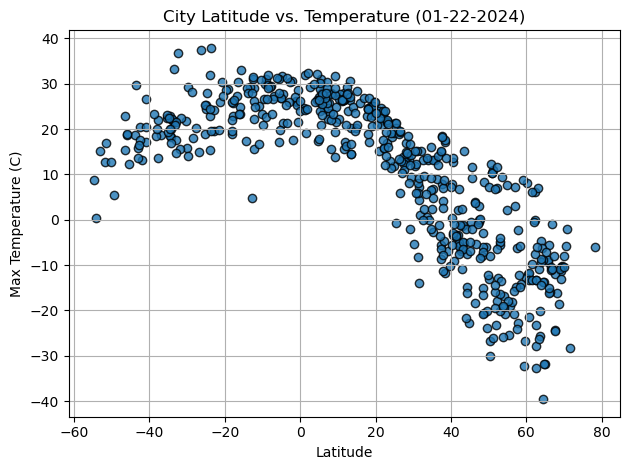

In [80]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
date = datetime.now()
date = date.strftime("%m-%d-%Y")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

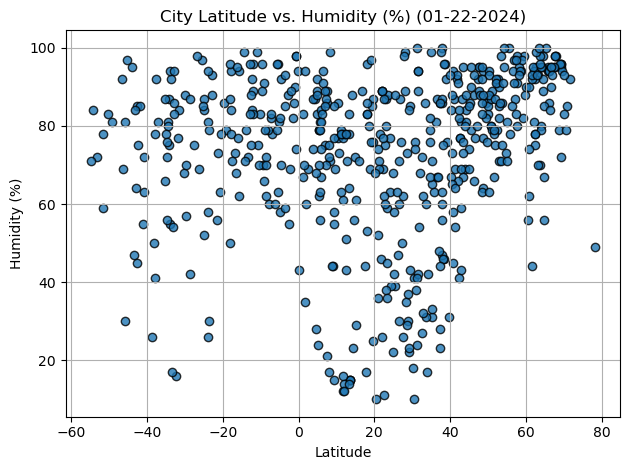

In [85]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
date = datetime.now()
date = date.strftime("%m-%d-%Y")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (%) ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

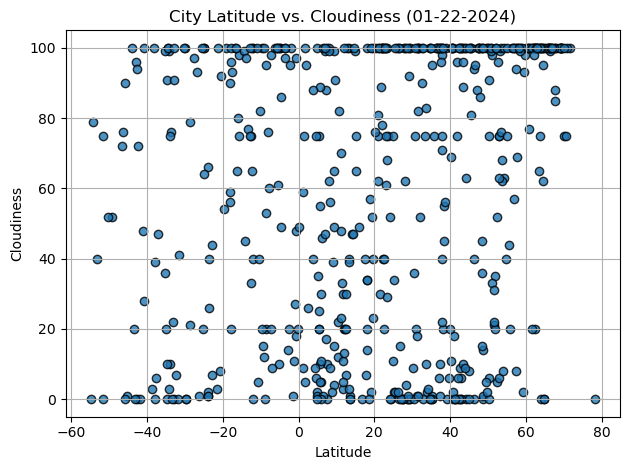

In [88]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
date = datetime.now()
date = date.strftime("%m-%d-%Y")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

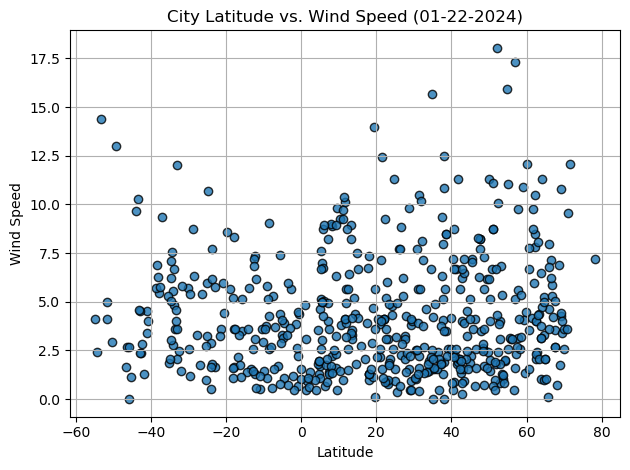

In [89]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
date = datetime.now()
date = date.strftime("%m-%d-%Y")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [90]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hemisphere_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]

# Display sample data
north_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,wailua homesteads,22.0669,-159.3780,23.24,89,100,4.12,US,1705896940
2,guerrero negro,27.9769,-114.0611,16.84,89,62,4.26,MX,1705896940
6,bonthe,7.5264,-12.5050,25.76,86,10,1.42,SL,1705896942
8,impfondo,1.6381,18.0667,19.07,35,5,0.94,CG,1705896942
9,bethel,41.3712,-73.4140,-3.80,69,0,1.79,US,1705896943


In [91]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hemisphere_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
south_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,18.78,81,47,9.34,SH,1705896939
3,huarmey,-10.0681,-78.1522,23.27,83,82,2.94,PE,1705896941
4,puerto natales,-51.7236,-72.4875,12.70,78,75,4.98,CL,1705896941
5,xique xique,-10.8217,-42.7311,25.13,75,5,0.51,BR,1705896941
7,port alfred,-33.5906,26.8910,21.77,92,76,3.58,ZA,1705896942


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8581171221207179


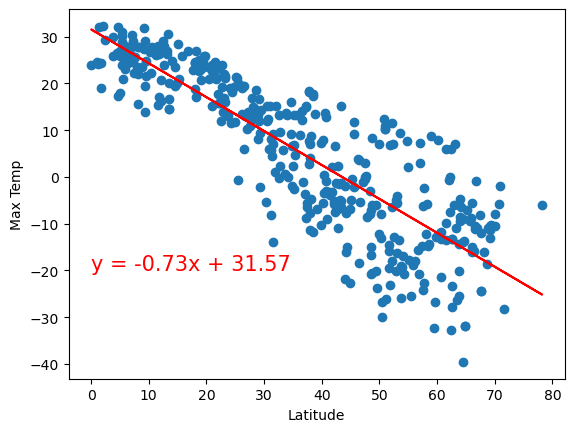

In [95]:
# Linear regression on Northern Hemisphere
x_values = north_hemisphere_df["Lat"]
y_values = north_hemisphere_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')


The r-value is 0.5524252278828108


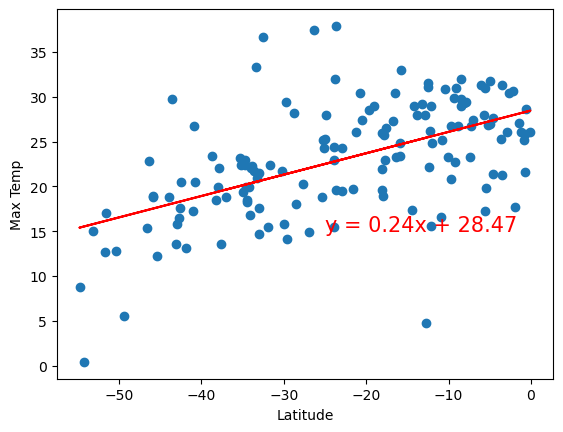

In [96]:
# Linear regression on Southern Hemisphere
x_values = south_hemisphere_df["Lat"]
y_values = south_hemisphere_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')

In [100]:
print("The regression shows a negative relationship in the Northern Hemisphere.")
print("As one moves away from 0 or the equator, the tempereture decreases")
print("While in the Southern Hemisphere, the regression shows a slightly positive relationship.")
print("Meaning, as one moves closer to 0 or the equator the tempereture increases")

The regression shows a negative relationship in the Northern Hemisphere.
As one moves away from 0 or the equator, the tempereture decreases
While in the Southern Hemisphere, the regression shows a slightly positive relationship.
Meaning, as one moves closer to 0 or the equator the tempereture increases


### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.4013642707326797


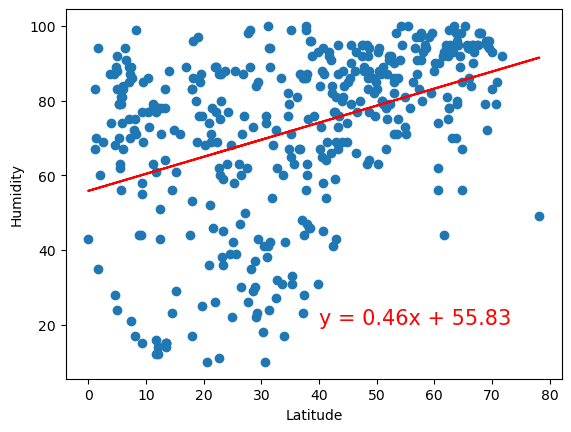

In [98]:
# Northern Hemisphere
x_values = north_hemisphere_df["Lat"]
y_values = north_hemisphere_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')


The r-value is 0.22770792782701268


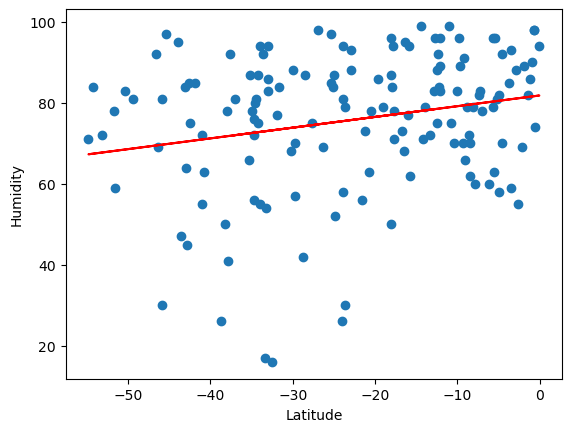

In [99]:
# Southern Hemisphere
x_values = south_hemisphere_df["Lat"]
y_values = south_hemisphere_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')


print("There is a slightly positive relationship between Latitude and Humidity in denser cities.")

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.3265205831381268


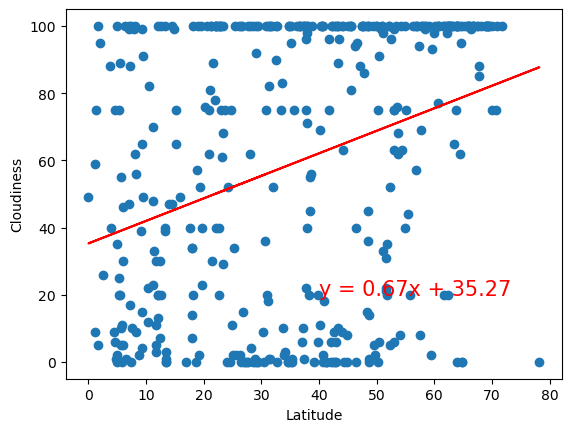

In [101]:
#Northern Hemisphere

x_values = north_hemisphere_df["Lat"]
y_values = north_hemisphere_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')

The r-value is 0.16988464050487714


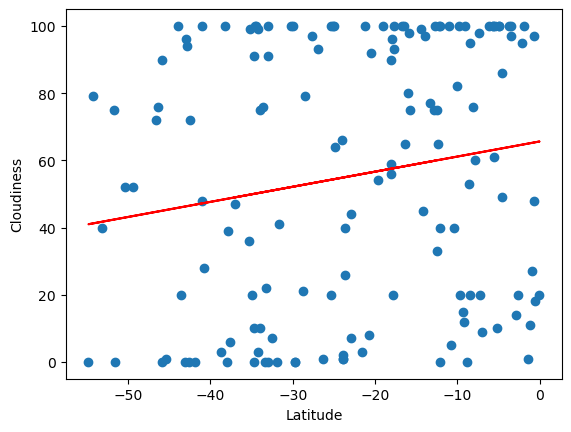

In [102]:
# Southern Hemisphere
x_values = south_hemisphere_df["Lat"]
y_values = south_hemisphere_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.10315543579948193


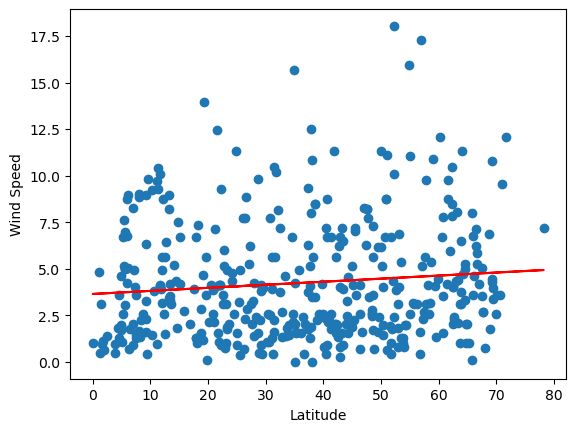

In [104]:
# Northern Hemisphere

x_values = north_hemisphere_df["Lat"]
y_values = north_hemisphere_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')

The r-value is -0.25869626259110134


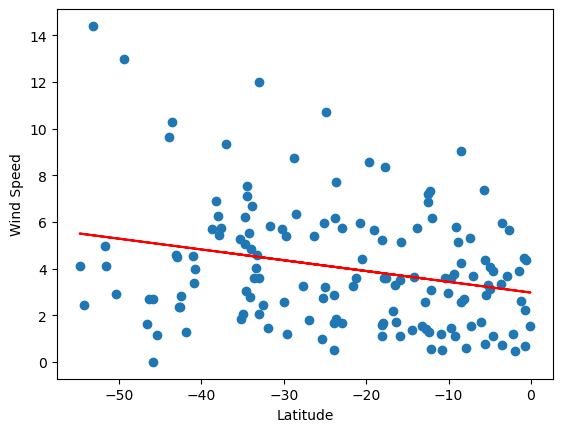

In [103]:
# Southern Hemisphere

x_values = south_hemisphere_df["Lat"]
y_values = south_hemisphere_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE